# Consumo y prevalencia de alcohol 2016-2017

Toda la información sobre los datos que se usan a continuación, son de una encuesta nacional de consumo de drogas y alcohol en México, se pueden encontrar en el siguiente link: https://www.gob.mx/salud%7Cconadic/acciones-y-programas/encuesta-nacional-de-consumo-de-drogas-alcohol-y-tabaco-encodat-2016-2017-136758.

In [22]:
# Importing important stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import plotly.graph_objects as go
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import shapely.geometry as sgeom
import cartopy.io.shapereader as shpreader
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as mpatches
import seaborn as sns
import warnings

Los datos están en un mismo excel, pero en distintas hojas, así que necesitamos tratarlas por separado.

## ¿A qué edad las personas comienzan a tomar?

Algo que nos podría preocupar ciertamente es, la edad incial a la cual las personas empiezan a tomar alcohol, para ellos, elaboramos la tabla 3 como se sigue.

In [23]:
# Esta primera tabla es Necesidades de atención por el Consumo de Alcohol en la población de 12 a 65 años
xls = pd.ExcelFile('./data/ENCODAT_ALCOHOL_2016_2017.xlsx')
df1 = pd.read_excel(xls, 'Table 4', header=0, usecols=list(range(7)))
alcoholData = []
for column in df1:
    alcoholData.append(list(df1[column]))
alcoholData = np.array(alcoholData).T
multi = [("Sexo",""),("2011","17 años o menos %"),("2011", "18 a 25 años %"), ("2011","26 a 65 años %"),("2017", "17 años o menos %"), ("2017","18 a 25 años %"),("2017", "26 a 65 años %")]
df1 = pd.DataFrame(alcoholData, columns=multi)
df1.columns = pd.MultiIndex.from_tuples(df1.columns)
df1 = df1.set_index("Sexo")
df1

2011                                            2017  \
        17 años o menos % 18 a 25 años % 26 a 65 años % 17 años o menos %   
Sexo                                                                        
Hombres              64.9           33.0            2.1              61.5   
Mujeres              43.3           46.1           10.6              43.1   
Total                55.2           38.9            5.9              53.1   

                                       
        18 a 25 años % 26 a 65 años %  
Sexo                                   
Hombres           36.5            2.0  
Mujeres           47.1            9.8  
Total             41.3            5.6

Aquí podemos ver los registros del 2011 y del 2017, comparemoslos en una gráfica

In [43]:
#fig, ax = plt.subplots(figsize = (7,5))
labels = ["17 años o menos","18 a 25 años", "26 a 65 años"]
hombres2011 = [64.9, 33.0, 2.1]
mujeres2011 = [43.3, 46.1, 10.6]
hombres2017 = [61.5, 36.5, 2.0]
mujeres2017 = [43.1, 47.1, 9.8]

In [104]:
colors = ['#424874', '#a6b1e1', '#dcd6f7']
fig = go.Figure(data=[go.Pie(labels=labels, values=hombres2011)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20, hole=.3,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Primera vez que probaron alcohol: Hombres 2011")
fig.show()

In [26]:
colors = ['#424874', '#a6b1e1', '#dcd6f7']
fig = go.Figure(data=[go.Pie(labels=labels, values=hombres2017)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20, hole=.3,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Primera vez que probaron alcohol: Hombres 2017")
fig.show()

In [27]:
colors = ['#c295d8', '#e4a3d4', '#f1c6d3']
fig = go.Figure(data=[go.Pie(labels=labels, values=mujeres2011)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20, hole=.3,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Primera vez que probaron alcohol: Mujeres 2011")
fig.show()

In [28]:
colors = ['#c295d8', '#e4a3d4', '#f1c6d3']
fig = go.Figure(data=[go.Pie(labels=labels, values=mujeres2017)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20, hole=.3,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Primera vez que probaron alcohol: Mujeres 2017")
fig.show()

De las gráficas anteriores, podemos observar que la mayoría de las personas, tanto hombres como mujeres, empiezan a tomar alcohol desde antes de los 18 años, esta es una edad en las personas son muy influenciables y puede ocasionar problemas en el futuro. Pero podemos notar algo interesante, y es que la cantidad de hombres que empezaron con el alcohol antes de los 17, en el 2011 es mayor a la cantidad del 2017, significa que algo ha pasado en ese transcurso del tiempo que ha llegado a disminuir el consumo en gente tan joven. O que nos faltan datos, mientras tanto, las mujeres siguen igual y de hecho sus gráficas no cambian significativamente en los años. 

Esta base de datos también nos proporciona información por regiones, de ahí nos podemos realizar algunas preguntas interesantes como:

## ¿Cuál es la zona o región donde más alcohol se consume?

In [29]:
# Consumo excesivo en el año y mes y por región
xls = pd.ExcelFile('./data/ENCODAT_ALCOHOL_2016_2017.xlsx')
df2 = pd.read_excel(xls, 'Table 8', header=1, usecols=list(range(5)))
alcoholData = []
for column in df2:
    alcoholData.append(list(df2[column]))
alcoholData = np.array(alcoholData).T
multi = [("Región",""),("2011","Consumo Excesivo en el Último Año"),("2011", "Consumo Excesivo en el Último Mes"), ("2017","Consumo Excesivo en el Último Año"),("2017", "Consumo Excesivo en el Último Mes")]
df2 = pd.DataFrame(alcoholData, columns=multi)
df2.columns = pd.MultiIndex.from_tuples(df2.columns)
df2 = df2.set_index("Región")
df2

2011  \
                 Consumo Excesivo en el Último Año   
Región                                               
Noroccidental                                 35.0   
Nororiental                                   29.3   
Occidental                                    24.3   
Centro                                        28.9   
Ciudad de México                              26.0   
Centro Sur                                    26.8   
Sur                                           21.9   
Nacional                                      28.0   

                                                    \
                 Consumo Excesivo en el Último Mes   
Región                                               
Noroccidental                                 20.0   
Nororiental                                   19.5   
Occidental                                    10.5   
Centro                                         9.0   
Ciudad de México                               9.8   
Centro Sur                                    10.8   
Sur                                           10.7   
Nacional                                      12.3   

                                              2017  \
                 Consumo Excesivo en el Último Año   
Región                                               
Noroccidental                                 33.8   
Nororiental                                   33.7   
Occidental                                    42.0   
Centro                                        32.6   
Ciudad de México                              37.0   
Centro Sur                                    30.8   
Sur                                           28.3   
Nacional                                      33.6   

                                                    
                 Consumo Excesivo en el Último Mes  
Región                                              
Noroccidental                                 22.5  
Nororiental                                   24.7  
Occidental                                    26.3  
Centro                                        17.5  
Ciudad de México                              18.5  
Centro Sur                                    15.7  
Sur                                           16.8  
Nacional                                      19.8

In [30]:
NO = [
    {"nombre":"Baja California", "lat":30.8406, "lon":-115.2838, "2011":{"CEUA": 35.0, "CEUM":20.0}, "2017":{"CEUA": 33.8, "CEUM": 22.5}},
    {"nombre": "Baja California Sur","lat":25.846111, "lon":-111.972778, "2011":{"CEUA": 35.0, "CEUM":20.0}, "2017":{"CEUA": 33.8, "CEUM": 22.5}},
    {"nombre": "Chihuahua", "lat":28.814167, "lon":-106.439444, "2011":{"CEUA": 35.0, "CEUM":20.0}, "2017":{"CEUA": 33.8, "CEUM": 22.5}},
    {"nombre": "Durango", "lat":24.934722, "lon":-104.911944, "2011":{"CEUA": 35.0, "CEUM":20.0}, "2017":{"CEUA": 33.8, "CEUM": 22.5}},
    {"nombre": "Sinaloa", "lat":25.002778, "lon":-107.502778, "2011":{"CEUA": 35.0, "CEUM":20.0}, "2017":{"CEUA": 33.8, "CEUM": 22.5}},
    {"nombre": "Sonora", "lat":29.646111, "lon":-110.868889, "2011":{"CEUA": 35.0, "CEUM":20.0}, "2017":{"CEUA": 33.8, "CEUM": 22.5}},
]
NE = [
    {"nombre":"Coahuila","lat":27.302222,"lon":-102.044722,"2011":{"CEUA":29.3,"CEUM":19.5}, "2017":{"CEUA":33.7,"CEUM":24.7}},
    {"nombre":"Nuevo Leon","lat":25.566667,"lon":-99.970556,"2011":{"CEUA":29.3,"CEUM":19.5}, "2017":{"CEUA":33.7,"CEUM":24.7}},
    {"nombre":"Tamaulipas","lat":24.287222,"lon":-98.563333,"2011":{"CEUA":29.3,"CEUM":19.5}, "2017":{"CEUA":33.7,"CEUM":24.7}}
]
O = [
    {"nombre":"Colima","lat":19.096667,"lon":-103.960833,"2011":{"CEUA":24.3,"CEUM":10.5}, "2017":{"CEUA":42.0,"CEUM":26.3}},
    {"nombre":"jalisco","lat":20.566667,"lon":-103.676389,"2011":{"CEUA":24.3,"CEUM":10.5}, "2017":{"CEUA":42.0,"CEUM":26.3}},
    {"nombre":"Michoacan","lat":19.168611,"lon":-101.899722,"2011":{"CEUA":24.3,"CEUM":10.5}, "2017":{"CEUA":42.0,"CEUM":26.3}},
    {"nombre":"Nayarit","lat":21.743889,"lon":-105.228333,"2011":{"CEUA":24.3,"CEUM":10.5}, "2017":{"CEUA":42.0,"CEUM":26.3}}
]
Norcentro = [
    {"nombre":"Aguascalientes","lat":22.021667,"lon":-102.356389,"2011":{"CEUA": 32.4,"CEUM": 19.8}, "2017":{"CEUA":35.8,"CEUM":25.0}},
    {"nombre":"Guanajuato","lat":21.018889,"lon":-101.262778,"2011":{"CEUA": 32.4,"CEUM": 19.8}, "2017":{"CEUA":35.8,"CEUM":25.0}},
    {"nombre":"Queretaro","lat":20.591,"lon":-100.391,"2011":{"CEUA": 32.4,"CEUM": 19.8}, "2017":{"CEUA":35.8,"CEUM":25.0}},
    {"nombre":"San Luis Potosi","lat":22.603333,"lon":-100.429722,"2011":{"CEUA": 32.4,"CEUM": 19.8}, "2017":{"CEUA":35.8,"CEUM":25.0}},
    {"nombre":"Zacatecas","lat":23.292778,"lon":-102.700556,"2011":{"CEUA": 32.4,"CEUM": 19.8}, "2017":{"CEUA":35.8,"CEUM":25.0}},
]
CentroSur = [
    {"nombre":"Estado de Mexico","lat":19.354167,"lon":-99.630833,"2011":{"CEUA": 26.8,"CEUM": 10.8}, "2017":{"CEUA":30.8,"CEUM":15.7}},
    {"nombre":"Morelos","lat":18.7475,"lon":-99.070278,"2011":{"CEUA": 26.8,"CEUM": 10.8}, "2017":{"CEUA":30.8,"CEUM":15.7}}
]
CDMX = [
    {"nombre":"Ciudad de Mexico","lat":19.419444,"lon":-99.145556,"2011":{"CEUA":26.0,"CEUM":9.8}, "2017":{"CEUA":37.0,"CEUM":18.5}}
]
Sur = [
    {"nombre":"Chiapas","lat":16.41,"lon":-92.408611,"2011":{"CEUA": 21.9,"CEUM": 10.7}, "2017":{"CEUA":28.3,"CEUM":16.8}},
    {"nombre":"Estado de Guerrero","lat":17.613056,"lon":-99.95,"2011":{"CEUA": 21.9,"CEUM": 10.7}, "2017":{"CEUA":28.3,"CEUM":16.8}},
    {"nombre":"Oaxaca","lat":16.898056,"lon":-96.414167,"2011":{"CEUA": 21.9,"CEUM": 10.7}, "2017":{"CEUA":28.3,"CEUM":16.8}},
    {"nombre":"Campeche","lat":18.836389,"lon":-90.403333,"2011":{"CEUA": 21.9,"CEUM": 10.7}, "2017":{"CEUA":28.3,"CEUM":16.8}},
    {"nombre":"Quintana Roo","lat":19.6,"lon":-87.916667,"2011":{"CEUA": 21.9,"CEUM": 10.7}, "2017":{"CEUA":28.3,"CEUM":16.8}},
    {"nombre":"Tabasco","lat":17.972222,"lon":-92.588889,"2011":{"CEUA": 21.9,"CEUM": 10.7}, "2017":{"CEUA":28.3,"CEUM":16.8}},
    {"nombre":"Yucatan","lat":20.833333,"lon":-89,"2011":{"CEUA": 21.9,"CEUM": 10.7}, "2017":{"CEUA":28.3,"CEUM":16.8}},

]

Este = [
    {"nombre":"Estado de Hidalgo","lat":20.478333,"lon":-98.863611,"2011":{"CEUA": 28.9,"CEUM": 9.0}, "2017":{"CEUA":32.6,"CEUM":17.5}},
    {"nombre":"Puebla","lat":19.003611,"lon":-97.888333,"2011":{"CEUA": 28.9,"CEUM": 9.0}, "2017":{"CEUA":32.6,"CEUM":17.5}},
    {"nombre":"Tlaxcala","lat":19.428889,"lon":-98.160833,"2011":{"CEUA": 28.9,"CEUM": 9.0}, "2017":{"CEUA":32.6,"CEUM":17.5}},
    {"nombre":"Veracruz ","lat":19.434722,"lon":-96.383056,"2011":{"CEUA": 28.9,"CEUM": 9.0}, "2017":{"CEUA":32.6,"CEUM":17.5}},

]

In [31]:
# Center the map
cLat, cLon = 23.59, -101.73

# Create the map
foliumMap = folium.Map(location=[cLat, cLon], zoom_start=5, tiles="cartodb positron")

# Full the map with data above
for row in NO:
    #print(row['lat'])
    #print("---------------")
    # Generating the map and the format
    popup_text = "<b>Nombre:</b> {} <br> <b>Consumo Excesivo en el Ultimo Year:</b> {}% <br> <b>Consumo Excesivo en el Ultimo Mes:</b> {}%".format(row["nombre"], row["2011"]["CEUA"], row["2011"]["CEUM"])
    # Adding Marks
    folium.CircleMarker(location=[row['lat'], row['lon']], radius=15, tooltip=popup_text, fill=True, fill_opacity=0.4, color="#ff5e0e").add_to(foliumMap)
for row in NE:
    #print(row['lat'])
    #print("---------------")
    # Generating the map and the format
    popup_text = "<b>Nombre:</b> {} <br> <b>Consumo Excesivo en el Ultimo Year:</b> {}% <br> <b>Consumo Excesivo en el Ultimo Mes:</b> {}%".format(row["nombre"], row["2011"]["CEUA"], row["2011"]["CEUM"])
    # Adding Marks
    folium.CircleMarker(location=[row['lat'], row['lon']], radius=14, tooltip=popup_text, fill=True, fill_opacity=0.4, color="#f55656").add_to(foliumMap)

for row in O:
    #print(row['lat'])
    #print("---------------")
    # Generating the map and the format
    popup_text = "<b>Nombre:</b> {} <br> <b>Consumo Excesivo en el Ultimo Year:</b> {}% <br> <b>Consumo Excesivo en el Ultimo Mes:</b> {}%".format(row["nombre"], row["2011"]["CEUA"], row["2011"]["CEUM"])
    # Adding Marks
    folium.CircleMarker(location=[row['lat'], row['lon']], radius=7, tooltip=popup_text, fill=True, fill_opacity=0.4, color="#c7ff0e").add_to(foliumMap)
    
for row in CDMX:
    #print(row['lat'])
    #print("---------------")
    # Generating the map and the format
    popup_text = "<b>Nombre:</b> {} <br> <b>Consumo Excesivo en el Ultimo Year:</b> {}% <br> <b>Consumo Excesivo en el Ultimo Mes:</b> {}%".format(row["nombre"], row["2011"]["CEUA"], row["2011"]["CEUM"])
    # Adding Marks
    folium.CircleMarker(location=[row['lat'], row['lon']], radius=8, tooltip=popup_text, fill=True, fill_opacity=0.4, color="#ffeb0e").add_to(foliumMap)

for row in Norcentro:
    #print(row['lat'])
    #print("---------------")
    # Generating the map and the format
    popup_text = "<b>Nombre:</b> {} <br> <b>Consumo Excesivo en el Ultimo Year:</b> {}% <br> <b>Consumo Excesivo en el Ultimo Mes:</b> {}%".format(row["nombre"], row["2011"]["CEUA"], row["2011"]["CEUM"])
    # Adding Marks
    folium.CircleMarker(location=[row['lat'], row['lon']], radius=17, tooltip=popup_text, fill=True, fill_opacity=0.4, color="#ff3a0e").add_to(foliumMap)

for row in CentroSur:
    #print(row['lat'])
    #print("---------------")
    # Generating the map and the format
    popup_text = "<b>Nombre:</b> {} <br> <b>Consumo Excesivo en el Ultimo Year:</b> {}% <br> <b>Consumo Excesivo en el Ultimo Mes:</b> {}%".format(row["nombre"], row["2011"]["CEUA"], row["2011"]["CEUM"])
    # Adding Marks
    folium.CircleMarker(location=[row['lat'], row['lon']], radius=10, tooltip=popup_text, fill=True, fill_opacity=0.4, color="#ffcf0e").add_to(foliumMap)

for row in Sur:
    #print(row['lat'])
    #print("---------------")
    # Generating the map and the format
    popup_text = "<b>Nombre:</b> {} <br> <b>Consumo Excesivo en el Ultimo Year:</b> {}% <br> <b>Consumo Excesivo en el Ultimo Mes:</b> {}%".format(row["nombre"], row["2011"]["CEUA"], row["2011"]["CEUM"])
    # Adding Marks
    folium.CircleMarker(location=[row['lat'], row['lon']], radius=4, tooltip=popup_text, fill=True, fill_opacity=0.4, color="#82ff0e").add_to(foliumMap)

for row in Este:
    #print(row['lat'])
    #print("---------------")
    # Generating the map and the format
    popup_text = "<b>Nombre:</b> {} <br> <b>Consumo Excesivo en el Ultimo Year:</b> {}% <br> <b>Consumo Excesivo en el Ultimo Mes:</b> {}%".format(row["nombre"], row["2011"]["CEUA"], row["2011"]["CEUM"])
    # Adding Marks
    folium.CircleMarker(location=[row['lat'], row['lon']], radius=13, tooltip=popup_text, fill=True, fill_opacity=0.4, color="#ffa30e").add_to(foliumMap)


In [32]:
# Center the map
cLat, cLon = 23.59, -101.73

# Create the map
foliumMap2017 = folium.Map(location=[cLat, cLon], zoom_start=5, tiles="cartodb positron")

# Full the map with data above
for row in NO:
    #print(row['lat'])
    #print("---------------")
    # Generating the map and the format
    popup_text = "<b>Nombre:</b> {} <br> <b>Consumo Excesivo en el Ultimo Year:</b> {}% <br> <b>Consumo Excesivo en el Ultimo Mes:</b> {}%".format(row["nombre"], row["2017"]["CEUA"], row["2017"]["CEUM"])
    # Adding Marks
    folium.CircleMarker(location=[row['lat'], row['lon']], radius=15, tooltip=popup_text, fill=True, fill_opacity=0.4, color="#ff760e").add_to(foliumMap2017)

for row in NE:
    #print(row['lat'])
    #print("---------------")
    # Generating the map and the format
    popup_text = "<b>Nombre:</b> {} <br> <b>Consumo Excesivo en el Ultimo Year:</b> {}% <br> <b>Consumo Excesivo en el Ultimo Mes:</b> {}%".format(row["nombre"], row["2017"]["CEUA"], row["2017"]["CEUM"])
    # Adding Marks
    folium.CircleMarker(location=[row['lat'], row['lon']], radius=14, tooltip=popup_text, fill=True, fill_opacity=0.4, color="#ff760e").add_to(foliumMap2017)

for row in O:
    #print(row['lat'])
    #print("---------------")
    # Generating the map and the format
    popup_text = "<b>Nombre:</b> {} <br> <b>Consumo Excesivo en el Ultimo Year:</b> {}% <br> <b>Consumo Excesivo en el Ultimo Mes:</b> {}%".format(row["nombre"], row["2017"]["CEUA"], row["2017"]["CEUM"])
    # Adding Marks
    folium.CircleMarker(location=[row['lat'], row['lon']], radius=20, tooltip=popup_text, fill=True, fill_opacity=0.4, color="#ff0e0e").add_to(foliumMap2017)
    
for row in CDMX:
    #print(row['lat'])
    #print("---------------")
    # Generating the map and the format
    popup_text = "<b>Nombre:</b> {} <br> <b>Consumo Excesivo en el Ultimo Year:</b> {}% <br> <b>Consumo Excesivo en el Ultimo Mes:</b> {}%".format(row["nombre"], row["2017"]["CEUA"], row["2017"]["CEUM"])
    # Adding Marks
    folium.CircleMarker(location=[row['lat'], row['lon']], radius=18, tooltip=popup_text, fill=True, fill_opacity=0.4, color="#ff360e").add_to(foliumMap2017)

for row in Norcentro:
    #print(row['lat'])
    #print("---------------")
    # Generating the map and the format
    popup_text = "<b>Nombre:</b> {} <br> <b>Consumo Excesivo en el Ultimo Year:</b> {}% <br> <b>Consumo Excesivo en el Ultimo Mes:</b> {}%".format(row["nombre"], row["2017"]["CEUA"], row["2017"]["CEUM"])
    # Adding Marks
    folium.CircleMarker(location=[row['lat'], row['lon']], radius=17, tooltip=popup_text, fill=True, fill_opacity=0.4, color="#ff760e").add_to(foliumMap2017)

for row in CentroSur:
    #print(row['lat'])
    #print("---------------")
    # Generating the map and the format
    popup_text = "<b>Nombre:</b> {} <br> <b>Consumo Excesivo en el Ultimo Year:</b> {}% <br> <b>Consumo Excesivo en el Ultimo Mes:</b> {}%".format(row["nombre"], row["2017"]["CEUA"], row["2017"]["CEUM"])
    # Adding Marks
    folium.CircleMarker(location=[row['lat'], row['lon']], radius=10, tooltip=popup_text, fill=True, fill_opacity=0.4, color="#ffcb0e").add_to(foliumMap2017)

for row in Sur:
    #print(row['lat'])
    #print("---------------")
    # Generating the map and the format
    popup_text = "<b>Nombre:</b> {} <br> <b>Consumo Excesivo en el Ultimo Year:</b> {}% <br> <b>Consumo Excesivo en el Ultimo Mes:</b> {}%".format(row["nombre"], row["2017"]["CEUA"], row["2017"]["CEUM"])
    # Adding Marks
    folium.CircleMarker(location=[row['lat'], row['lon']], radius=8, tooltip=popup_text, fill=True, fill_opacity=0.4, color="#e3ff0e").add_to(foliumMap2017)

for row in Este:
    #print(row['lat'])
    #print("---------------")
    # Generating the map and the format
    popup_text = "<b>Nombre:</b> {} <br> <b>Consumo Excesivo en el Ultimo Year:</b> {}% <br> <b>Consumo Excesivo en el Ultimo Mes:</b> {}%".format(row["nombre"], row["2017"]["CEUA"], row["2017"]["CEUM"])
    # Adding Marks
    folium.CircleMarker(location=[row['lat'], row['lon']], radius=12, tooltip=popup_text, fill=True, fill_opacity=0.4, color="#ff9f0e").add_to(foliumMap2017)


## Mapa de consumo excesivo en el último año y mes del 2011 

In [33]:
# Deploy the map
foliumMap

## Mapa de consumo excesivo en el último año y mes del 2017

In [34]:
# Deploy the map
foliumMap2017

**Nota:** Por alguna razón, estos mapas, que son interactivos, no parecen ser rendereados por __**Github**__ lo cual es una problemática para este repositorio debido a que están bien bonitos. Sin embargo, los mapas los puede ver e interactuar con ellos en el siguiente link: 


https://nbviewer.jupyter.org/github/BubuDavid/da2020-BubuDavid/blob/master/MiniProject/MiniProject.ipynb

Notemos las diferencias en los mapas del 2011 y del 2017, es impresionante como subió el Oeste del país, desconozco las razones o qué pasó en ese periodo, sin embargo localmente en esa zona, subió de una manera increíblemente grande. De manera global, todo el país subió un poco en su consumo excesivo, lo cual es preocupante, esto combinado con que la gran mayoría de las personas en México empiezan a tomar desde antes de los 17 hace que reflexionemos.

## ¿Cuál es la edad en la que hay un consumo mayor de alcohol?

In [35]:
# Tabla de litros de alcohol percápita por rango de edades
xls = pd.ExcelFile('./data/ENCODAT_ALCOHOL_2016_2017.xlsx')
df3 = pd.read_excel(xls, 'Table 41', header=1, usecols=list(range(7)))
alcoholData = []
for column in df3:
    alcoholData.append(list(df3[column]))
alcoholData = np.array(alcoholData).T
multi = [("Sexo"),("12 a 17 años"),("18 a 29 años"), ("30 a 39 años"),("40 a 49 años"), ("50 años o más"), ("Total")]
df3 = pd.DataFrame(alcoholData, columns=multi)
df3 = df3.set_index("Sexo")
df3

,12 a 17 años,18 a 29 años,30 a 39 años,40 a 49 años,50 años o más,Total
Sexo,,,,,,
Hombres,3.784,11.827,7.482,6.214,3.978,7.269
Mujeres,3.439,3.468,1.22,0.82,0.785,2.076
Total,3.613,7.612,4.054,3.285,2.362,4.583


In [36]:
hombres = [float(element) for element in df3.loc["Hombres"]]
mujeres = [float(element) for element in df3.loc["Mujeres"]]
hombres.pop()
mujeres.pop()

2.076

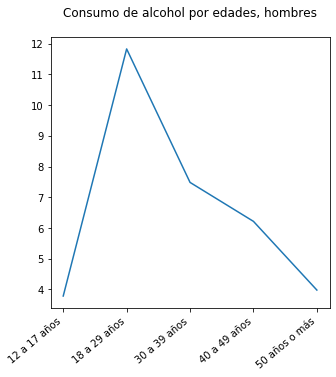

In [108]:
fig, ax = plt.subplots(figsize = (5,5))

ax.plot(df3.columns[:-1], hombres)
plt.title("Consumo de alcohol por edades, hombres", pad=20)
#ax.legend()
plt.setp(ax.get_xticklabels(), rotation=40, ha="right")
plt.savefig("./Graphs/ConsumoHombres")
ax.plot()
d = 1

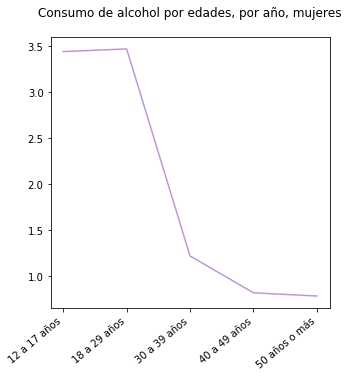

In [109]:
fig, ax = plt.subplots(figsize = (5,5))

ax.plot(df3.columns[:-1], mujeres, color="#c295d8")
plt.title("Consumo de alcohol por edades, por año, mujeres", pad=20)
#ax.legend()
plt.setp(ax.get_xticklabels(), rotation=40, ha="right")
plt.savefig("./Graphs/ConsumoMujeres")
ax.plot()
d = 1

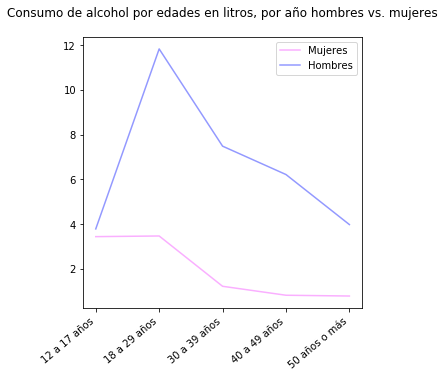

In [110]:
fig, ax = plt.subplots(figsize = (5,5))

ax.plot(df3.columns[:-1], mujeres, color="#faafff", label="Mujeres")
ax.plot(df3.columns[:-1], hombres, color = "#9399ff", label="Hombres")
plt.title("Consumo de alcohol por edades en litros, por año hombres vs. mujeres", pad=20)
ax.legend()
plt.setp(ax.get_xticklabels(), rotation=40, ha="right")
plt.savefig("./Graphs/ConsumoHombresvsMujeres")
ax.plot()
d = 1

Note que los jóvenes de entre 18 a 29 años varones son los que más consumen alcohol, y definitivamente sigue siendo preocupante el consumo antes de la mayoría de edad.

## ¿Cuál es el consumo per capita por región? ¿Dónde se consume más alcohol por persona?

In [40]:
# Tabla de litros de alcohol percápita por rango de edades
xls = pd.ExcelFile('./data/ENCODAT_ALCOHOL_2016_2017.xlsx')
df4 = pd.read_excel(xls, 'Table 43', header=2, usecols=list(range(4)))
alcoholData = []
for column in df4:
    alcoholData.append(list(df4[column]))
alcoholData = np.array(alcoholData).T[:-1]
multi = [("Estado"),("Hombres"),("Mujeres"), ("Total")]
df4 = pd.DataFrame(alcoholData, columns=multi)
df4 = df4.set_index("Estado")
df4

,Hombres,Mujeres,Total
Estado,,,
Aguascalientes,10.948,3.917,7.284
Baja California,7.5,1.749,4.654
Baja California Sur,6.556,2.418,4.542
Campeche,10.649,1.909,6.175
Chiapas,3.637,0.656,2.084
Chihuahua,7.503,3.389,5.418
Distrito Federal,6.867,2.35,4.508
Coahuila,10.864,2.563,6.666
Colima,9.18,2.554,5.845


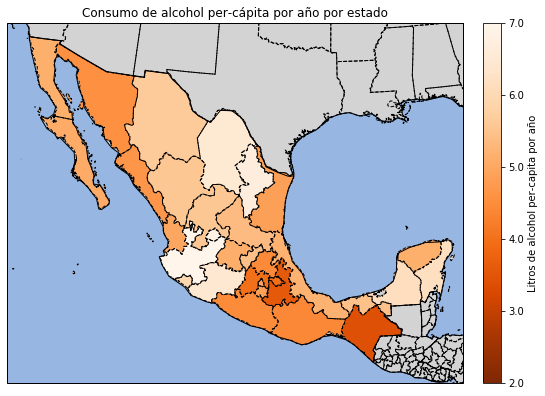

In [111]:
fig = plt.figure(figsize = (7,5))
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())
ax.set_extent([-114, -87, 13, 34], ccrs.Geodetic())


shapename = 'admin_1_states_provinces'
states_shp = shpreader.natural_earth(resolution='10m',
                                    category='cultural', name=shapename)

cmap = mpl.cm.PRGn
maximo = max(np.array(df4["Total"]))
minimo = min(np.array(df4["Total"]))

cmap = mpl.cm.Oranges_r

for state in shpreader.Reader(states_shp).records():
    if state.attributes["admin"] == "Mexico":
        stateName = state.attributes['name']
        if stateName in np.array(df4.index):
            number = float(df4[df4.index == stateName]["Total"])
            ax.add_geometries(state.geometry, ccrs.PlateCarree(), facecolor=cmap(number / float(maximo),1), label=stateName)
        else:
            #print(stateName)
            ax.add_geometries(state.geometry, ccrs.PlateCarree(),
                              facecolor='#FAFAFA',
                              label=stateName)

ax.add_feature(cfeature.BORDERS, linestyle='solid')
ax.add_feature(cfeature.COASTLINE, linestyle = "solid")
ax.add_feature(cfeature.NaturalEarthFeature('cultural', 'admin_1_states_provinces', "10m",edgecolor='black', facecolor='none'), linestyle = "--")
ax.add_feature(cfeature.LAND, facecolor = "lightgray")
ax.add_feature(cfeature.OCEAN)
ax.set_title("Consumo de alcohol per-cápita por año por estado")

cbar = plt.colorbar(plt.cm.ScalarMappable(cmap = "Oranges_r"), label = "Litros de alcohol per-capita por año", fraction = 0.046, pad = 0.04, )

indices = np.linspace(round(float(minimo)), round(float(maximo)), 6)
cbar.ax.set_yticklabels(indices)
plt.savefig("./Graphs/ConsumoAlcoholPerCapita")
d=1

## ¿Por qué las personas no acuden debido a su problema de alcoholismo?

In [42]:
# Razones para no acudir a ayuda
xls = pd.ExcelFile('./data/ENCODAT_ALCOHOL_2016_2017.xlsx')
df5 = pd.read_excel(xls, 'Table 56', header=1, usecols=list(range(7)))
alcoholData = []
for column in df5:
    alcoholData.append(list(df5[column]))
alcoholData = np.array(alcoholData).T[:-2]
multi = [("Respuestas", ""),("12-25 años", "N"),("12-25 años", "%"),("26-34 años", "N"),("26-34 años", "%"),("35-65 años", "N"),("35-65 años", "N")]
df5 = pd.DataFrame(alcoholData, columns=multi)
df5.columns = pd.MultiIndex.from_tuples(df5.columns)
df5 = df5.set_index("Respuestas")
df5

c:\users\david\miniconda3\lib\site-packages\IPython\core\async_helpers.py:68: PerformanceWarning:

indexing past lexsort depth may impact performance.



12-25 años        \
                                                            N     %   
Respuestas                                                            
Pensó que no tenía un problema                      2390555.0  30.0   
Pensó que podría resolverlo solo                    1650042.0  20.5   
Creyó que el tratamiento no le ayudaría              497164.0   6.2   
No sabe a dónde acudir                               657686.0   8.3   
No acudió por vergüenza                              405734.0   5.0   
Los centros de tratamiento le quedan lejos de s...   601524.0   7.8   
No cuenta con suficientes recursos económicos        498279.0   6.3   
Su seguro médico no cubre este tratamiento           348733.0   4.6   
El problema se acabó solo                           1665567.0  21.3   
Pensó que el problema mejoraría solo                1913596.0  24.0   
Le preocupa  lo que la gente piense de usted         349078.0   4.3   
Pensó que le tomaría mucfto tiempo                   509051.0   6.3   
No podía conseguir una cita                          183439.0   2.3   
No deseaba ser internado en contra de su voluntad    637157.0   7.9   
No estaba satisfecfto con los servicios disponi...   420672.0   5.4   
Había recibido tratamiento antes y no ftabía fu...    97809.0   1.2   
El problema no le molesta mucfto                     531155.0   6.6   
Le resulta difícil llegar al sitio donde lo ate...   241093.0   3.1   
Cualquier otra                                       146906.0   1.9   

                                                   26-34 años        \
                                                            N     %   
Respuestas                                                            
Pensó que no tenía un problema                      1869085.0  28.8   
Pensó que podría resolverlo solo                    1221016.0  18.8   
Creyó que el tratamiento no le ayudaría              486138.0   7.5   
No sabe a dónde acudir                               423684.0   6.5   
No acudió por vergüenza                              274494.0   4.2   
Los centros de tratamiento le quedan lejos de s...   462676.0   7.5   
No cuenta con suficientes recursos económicos        441105.0   6.8   
Su seguro médico no cubre este tratamiento           302079.0   4.9   
El problema se acabó solo                           1005727.0  15.6   
Pensó que el problema mejoraría solo                1255248.0  19.5   
Le preocupa  lo que la gente piense de usted         260109.0   4.0   
Pensó que le tomaría mucfto tiempo                   401332.0   6.2   
No podía conseguir una cita                          149399.0   2.4   
No deseaba ser internado en contra de su voluntad    343867.0   5.3   
No estaba satisfecfto con los servicios disponi...   385199.0   6.1   
Había recibido tratamiento antes y no ftabía fu...    63560.0   1.0   
El problema no le molesta mucfto                     373664.0   5.8   
Le resulta difícil llegar al sitio donde lo ate...   180938.0   2.8   
Cualquier otra                                        97508.0   1.5   

                                                   35-65 años        
                                                            N     N  
Respuestas                                                           
Pensó que no tenía un problema                      3256729.0  28.2  
Pensó que podría resolverlo solo                    2880131.0  25.0  
Creyó que el tratamiento no le ayudaría              936884.0   8.2  
No sabe a dónde acudir                               977037.0   8.5  
No acudió por vergüenza                              851933.0   7.3  
Los centros de tratamiento le quedan lejos de s...   919900.0   8.3  
No cuenta con suficientes recursos económicos        799904.0   6.9  
Su seguro médico no cubre este tratamiento           429134.0   3.8  
El problema se acabó solo                           2245461.0  19.5  
Pensó que el problema mejoraría solo                2702489.0  23.5  
Le preocupa  lo

In [100]:
# Abajo están las legends de cada color, o si lo prefiere también, hacerle saber que el gráfico es interactivo.
colors = ['#424874', '#a6b1e1', '#dcd6f7']
fig = go.Figure(data=[go.Pie(labels=df5.index, values=df5["12-25 años"]["%"])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.update(layout_title_text="¿Por qué no buscan ayuda?",
           layout_showlegend=False)
fig.update_layout(legend=dict(x=0, y=0))
fig.show()

In [81]:
colors = ['#424874', '#a6b1e1', '#dcd6f7']
fig = go.Figure(data=[go.Pie(labels=df5.index, values=df5["12-25 años"]["%"])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.update(layout_title_text="¿Por qué no buscan ayuda?",
           layout_showlegend=True)
fig.update_layout(legend=dict(x=0, y=0))
fig.show()